<a href="https://colab.research.google.com/github/shraishwarya/Face-Mask-Detection/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2024-07-24 06:26:21--  https://github.com/kauravs1222/Face-Mask-Detector/raw/master/keras_model.h5
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/aman-singh-kaurav/Face-Mask-Detector/raw/master/keras_model.h5 [following]
--2024-07-24 06:26:21--  https://github.com/aman-singh-kaurav/Face-Mask-Detector/raw/master/keras_model.h5
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/aman-singh-kaurav/Face-Mask-Detector/master/keras_model.h5 [following]
--2024-07-24 06:26:22--  https://raw.githubusercontent.com/aman-singh-kaurav/Face-Mask-Detector/master/keras_model.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubu

<IPython.core.display.Javascript object>

NotFoundError: Requested device not found


<ipython-input-7-be9d44bc41b3>:65: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = ImageOps.fit(image, size, Image.ANTIALIAS)


1/1 [==============================] - 2s 2s/step


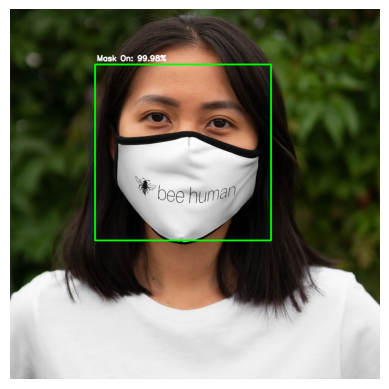

In [ ]:
!wget -O keras_model.h5 https://github.com/kauravs1222/Face-Mask-Detector/raw/master/keras_model.h5
!wget -O haarcascade_frontalface_default.xml https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

import tensorflow.keras
from PIL import Image, ImageOps
import numpy as np
import cv2
import matplotlib.pyplot as plt


model = tensorflow.keras.models.load_model('keras_model.h5', compile=False)

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);
            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            await new Promise((resolve) => capture.onclick = resolve);
            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
        ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename


from IPython.display import Image as Image1
try:
    filename = take_photo()
    print('Saved to {}'.format(filename))

    display(Image1(filename))
except Exception as err:
    print(str(err))

image_path = '/content/mask'

size = (224, 224)
image = Image.open(image_path)
image = ImageOps.fit(image, size, Image.ANTIALIAS)
image_array = np.asarray(image)
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
data[0] = normalized_image_array

pred = model.predict(data)
prediction = pred.argmax(axis=-1)
label = "Mask On" if prediction == 0 else "No Mask"
label = "{}: {:.2f}%".format(label, max(pred[0]) * 100)
color = (0, 255, 0) if prediction == 0 else (255, 0, 0)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
img = cv2.imread(image_path)

if img is None:
    print("Error: Could not open or find the image.")

else:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    if len(faces) != 0:
        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x+w, y+h), color, 4)
            cv2.putText(img, label, (x+5, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
    else:
        cv2.putText(img, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)


    im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(im_rgb)
    plt.axis('off')
    plt.show()

--2024-07-24 06:29:50--  https://github.com/kauravs1222/Face-Mask-Detector/raw/master/keras_model.h5
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/aman-singh-kaurav/Face-Mask-Detector/raw/master/keras_model.h5 [following]
--2024-07-24 06:29:50--  https://github.com/aman-singh-kaurav/Face-Mask-Detector/raw/master/keras_model.h5
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/aman-singh-kaurav/Face-Mask-Detector/master/keras_model.h5 [following]
--2024-07-24 06:29:51--  https://raw.githubusercontent.com/aman-singh-kaurav/Face-Mask-Detector/master/keras_model.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubu

<IPython.core.display.Javascript object>

NotFoundError: Requested device not found


<ipython-input-8-df5c175bfc87>:65: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = ImageOps.fit(image, size, Image.ANTIALIAS)


1/1 [==============================] - 1s 913ms/step


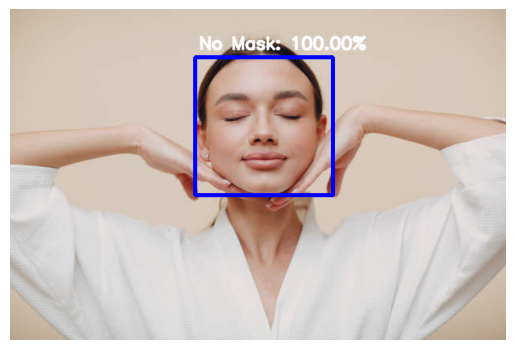

In [ ]:
!wget -O keras_model.h5 https://github.com/kauravs1222/Face-Mask-Detector/raw/master/keras_model.h5
!wget -O haarcascade_frontalface_default.xml https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

import tensorflow.keras
from PIL import Image, ImageOps
import numpy as np
import cv2
import matplotlib.pyplot as plt


model = tensorflow.keras.models.load_model('keras_model.h5', compile=False)

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);
            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            await new Promise((resolve) => capture.onclick = resolve);
            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
        ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename


from IPython.display import Image as Image1
try:
    filename = take_photo()
    print('Saved to {}'.format(filename))

    display(Image1(filename))
except Exception as err:
    print(str(err))

image_path = '/content/face.jpg'

size = (224, 224)
image = Image.open(image_path)
image = ImageOps.fit(image, size, Image.ANTIALIAS)
image_array = np.asarray(image)
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
data[0] = normalized_image_array

pred = model.predict(data)
prediction = pred.argmax(axis=-1)
label = "Mask On" if prediction == 0 else "No Mask"
label = "{}: {:.2f}%".format(label, max(pred[0]) * 100)
color = (0, 255, 0) if prediction == 0 else (255, 0, 0)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
img = cv2.imread(image_path)

if img is None:
    print("Error: Could not open or find the image.")

else:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    if len(faces) != 0:
        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x+w, y+h), color, 4)
            cv2.putText(img, label, (x+5, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
    else:
        cv2.putText(img, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)


    im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(im_rgb)
    plt.axis('off')
    plt.show()